<a href="https://colab.research.google.com/github/Vk09Github/GitProject/blob/main/Langgraph_Chatbot_with_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 756.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install arxiv Wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.5 MB/s eta 0:00:00
  Created wheel for Wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=d84864d39e7cb3b155b98015442a768803a268e54478687bf30e33d7e9826ec6
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=f335fe3acaec4fe18c03e80547a69a484d538704b01629b14d621260be438a43
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built Wikipedia sgmllib3k


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
## Working with external tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

## Arxiv and Wikipedia Tools

arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)





In [ ]:
wiki_tool.invoke('who is Sachin Tendulkar?')

'Page: Sachin Tendulkar\nSummary: Sachin Ramesh Tendulkar ( ; Marathi: [sətɕin t̪eɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. He is widely regarded as one of the greatest cricketers of all time, and is the holder of several world re'

In [ ]:
arxiv_tool.invoke('Attention is all you need')

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [ ]:
tools=[wiki_tool]

In [ ]:
## Langgraph Application
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]


In [ ]:
from langgraph.graph import StateGraph,START,END

In [ ]:
graph_builder=StateGraph(State)


In [ ]:
from langchain_groq import ChatGroq


In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')


In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name='gemma2-9b-it')
llm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b54f58155d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b54f51f66d0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm_with_tools=llm.bind_tools(tools=tools)

In [ ]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}


In [ ]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
# #graph_builder.add_node("chatbot",chatbot)
# graph_builder.add_edge(START,"chatbot")
# tool_node=ToolNode(tools=tools)
# graph_builder.add_node("tools",tool_node)

# graph_builder.add_conditional_edges(
#     "chatbot",
#     tools_condition
# )
# graph_builder.add_edge("tools","chatbot")
# graph_builder.add_edge("chatbot",END)


In [ ]:
# Check if the 'chatbot' node already exists before adding it
if "chatbot" not in graph_builder.nodes:
  graph_builder.add_node("chatbot", chatbot)
else:
  print("Node 'chatbot' already exists in the graph.")

# The rest of your code remains the same
graph_builder.add_edge(START, "chatbot")
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("chatbot", END)

Node 'chatbot' already exists in the graph.


In [ ]:
graph=graph_builder.compile()

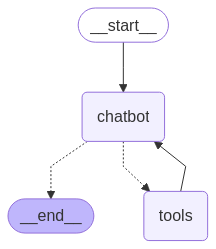

In [ ]:
from IPython.display import Image,display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  #This requires some extra dependencies and is optional
  pass


In [ ]:
user_input="Hi There! My name is John"

events=graph.stream(
    {"messages":[("user",user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi There! My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_eq5f)
 Call ID: call_eq5f
  Args:
    query: John


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_nx7p)
 Call ID: call_nx7p
  Args:
    query: John Doe
================================= Tool Message =================================
Name: wikipedia

Page: John Doe
Summary: John Doe (male) and Jane Doe (female) are multiple-use placeholder names that are used in the British and American legal system and assigned generally in the United Kingdom and the United States when the true name of a person is unknown or is being intentionally concealed. In
================================== Ai Message ==================================

Nice to meet you John Doe!
